In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [61]:
# modified from: http://cs231n.github.io/neural-networks-case-study/
class Data_spiral(Dataset):

    def __init__(self, K = 3, N = 200):
        D = 2
        X = np.zeros((N * K, D))
        y = np.zeros(N * K, dtype = 'uint8')
        for j in range(K):
            ix = range(N * j, N * (j + 1))
            r = np.linspace(0.0, 1, N)
            t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2
            X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
            y[ix] = j
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = self.y.shape[0]

    def __getitem__(self, item):
        return self.x[item],self.y[item]

    def __len__(self):
        return self.len

    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(),self.x[self.y[:] == 0,1].numpy(), 'o', label = "y = 0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(),self.x[self.y[:] == 1,1].numpy(), 'ro', label = "y = 1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2,1].numpy(), 'go', label = "y = 2")
        #plt.plot(self.x[self.y[:] == 3, 0].numpy(),self.x[self.y[:] == 3,1].numpy(), 'bo', label = "y = 3")
        plt.legend()

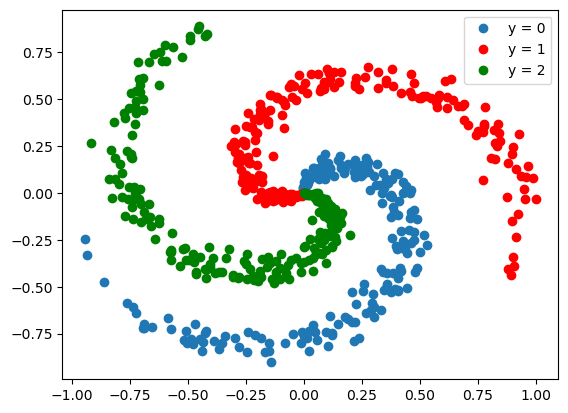

In [62]:
data = Data_spiral()
data.plot_data()


In [ ]:
class Data_spiral(Dataset):

    def __init__(self, K = 3, N = 500):
        D = 2
        X = np.zeros((N * K, D))
        y = np.zeros(N * K, dtype = 'uint8')
        for j in range(K):
            ix = range(N * j, N * (j + 1))
            r = np.linspace(0.0, 1, N)
            t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.3
            X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
            y[ix] = j
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = self.y.shape[0]

    def __getitem__(self, item):
        return self.x[item],self.y[item]

    def __len__(self):
        return self.len

    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(),self.x[self.y[:] == 0,1].numpy(), 'o', label = "y = 0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(),self.x[self.y[:] == 1,1].numpy(), 'ro', label = "y = 1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2,1].numpy(), 'go', label = "y = 2")
        plt.legend()

In [ ]:
class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    # Prediction
    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation